In [4]:
import uproot
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
log_columns = [
                # 'fMassK0',
                # 'fMassLambda',
                # 'fMassAntiLambda',
                # 'fPt',
                # 'fPtPos',
                # 'fPtNeg',
                'fRadius',
                'fCpa',
                # 'fNSigmaTpcPosPi',
                # 'fNSigmaTpcNegPi',
                # 'fNSigmaTpcPosPr',
                # 'fNSigmaTpcNegPr',
                # 'fNSigmaTofPosPi',
                # 'fNSigmaTofNegPi',
                # 'fNSigmaTofPosPr',
                # 'fNSigmaTofNegPr',
                # 'fAlphaArm',
                # 'fQtArm',
                # 'fOccupancyFt0c',
                # 'fOccupancyIts',
                # 'fCentralityFT0C',
                # 'fCentralityFT0M',
                # 'fCandFlag'
               ]

custom_ranges = {
        'fMassK0': (0.4, 0.6),
        'fMassLambda': (1.07, 1.3),
        'fMassAntiLambda': (1.07, 1.3),
        'fPt': (0, 5),
        'fPtPos': (0, 5),
        'fPtNeg': (0, 5),
        'fRadius': (0, 50),
        # 'fCpa': (0, 1),
        'fNSigmaTpcPosPi': (-10, 10),
        'fNSigmaTpcNegPi': (-10, 10),
        'fNSigmaTpcPosPr': (-10, 10),
        'fNSigmaTpcNegPr': (-10, 10),
        'fNSigmaTofPosPi': (-10, 10),
        'fNSigmaTofNegPi': (-10, 10),
        'fNSigmaTofPosPr': (-10, 10),
        'fNSigmaTofNegPr': (-10, 10),
        # 'fAlphaArm': (0, 1),
        # 'fQtArm': (0, 1),
        'fOccupancyFt0c': (0, 14000),
        'fOccupancyIts': (0, 1400),
        # 'fCentralityFT0C': (0, 1),
        # 'fCentralityFT0M': (0, 1),
        # 'fCandFlag': (0, 1)
}

custom_bins = {
        'fMassK0': 100,
        'fMassLambda': 100,
        'fMassAntiLambda': 100,
        'fPt': 100,
        'fPtPos': 100,
        'fPtNeg': 100,
        'fRadius': 100,
        'fCpa': 100,
        'fNSigmaTpcPosPi': 100,
        'fNSigmaTpcNegPi': 100,
        'fNSigmaTpcPosPr': 100,
        'fNSigmaTpcNegPr': 100,
        'fNSigmaTofPosPi': 100,
        'fNSigmaTofNegPi': 100,
        'fNSigmaTofPosPr': 100,
        'fNSigmaTofNegPr': 100,
        'fAlphaArm': 100,
        'fQtArm': 100,
        'fOccupancyFt0c': 100,
        'fOccupancyIts': 100,
        'fCentralityFT0C': 100,
        'fCentralityFT0M': 100,
        'fCandFlag': 100
}

n_columns = 23
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

df_data_pp = "/data/shared/hf_pid_studies/LHC22o_pass7/Train300243/Tree_LHC22o_K0s_Lambda.root"
df_data_pbpb = "/data/shared/hf_pid_studies_pbpb/Data/Train301810/AO2D_LHC23zzh_pass4_small_v0s.root"
df_mc_pp = "/home/mdicosta/hf_pid_studies/datasets/LHC24g5/Train300601/Tree_LHC24g5_K0s_Lambda.root"
df_mc_pbpb = "/data/shared/hf_pid_studies_pbpb/MC/Train303621/AO2D_LHC24g2_small.root"

# DATA 


#### pp

In [21]:
if df_data_pp != "": 
    dfs_data_pp = []
    with uproot.open(df_data_pp) as f:
        print(f.keys())
        for iKey, key in enumerate(f.keys()):
            if 'pidv0s' in key:
                print(key)
                dfData = f[key].arrays(library='pd')
                dfs_data_pp.append(dfData)
    
    merged_df_data_pp = pd.concat([df for df in dfs_data_pp], ignore_index=True)
    print(f"Number of dataframe entries: {len(merged_df_data_pp)}")
    print(f"Dataframe columns: {merged_df_data_pp.columns}")

['DF_2261906079905024;1', 'DF_2261906079905024/O2pidcascades;1', 'DF_2261906079905024/O2pidv0s;1', 'DF_2261906079905024/O2probematching;1']
DF_2261906079905024/O2pidv0s;1
Number of dataframe entries: 61222597
Dataframe columns: Index(['fMassK0', 'fMassLambda', 'fMassAntiLambda', 'fPt', 'fPtPos', 'fPtNeg',
       'fRadius', 'fCpa', 'fNSigmaTpcPosPi', 'fNSigmaTpcNegPi',
       'fNSigmaTpcPosPr', 'fNSigmaTpcNegPr', 'fNSigmaTofPosPi',
       'fNSigmaTofNegPi', 'fNSigmaTofPosPr', 'fNSigmaTofNegPr', 'fAlphaArm',
       'fQtArm', 'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C',
       'fCentralityFT0M', 'fCandFlag'],
      dtype='object')


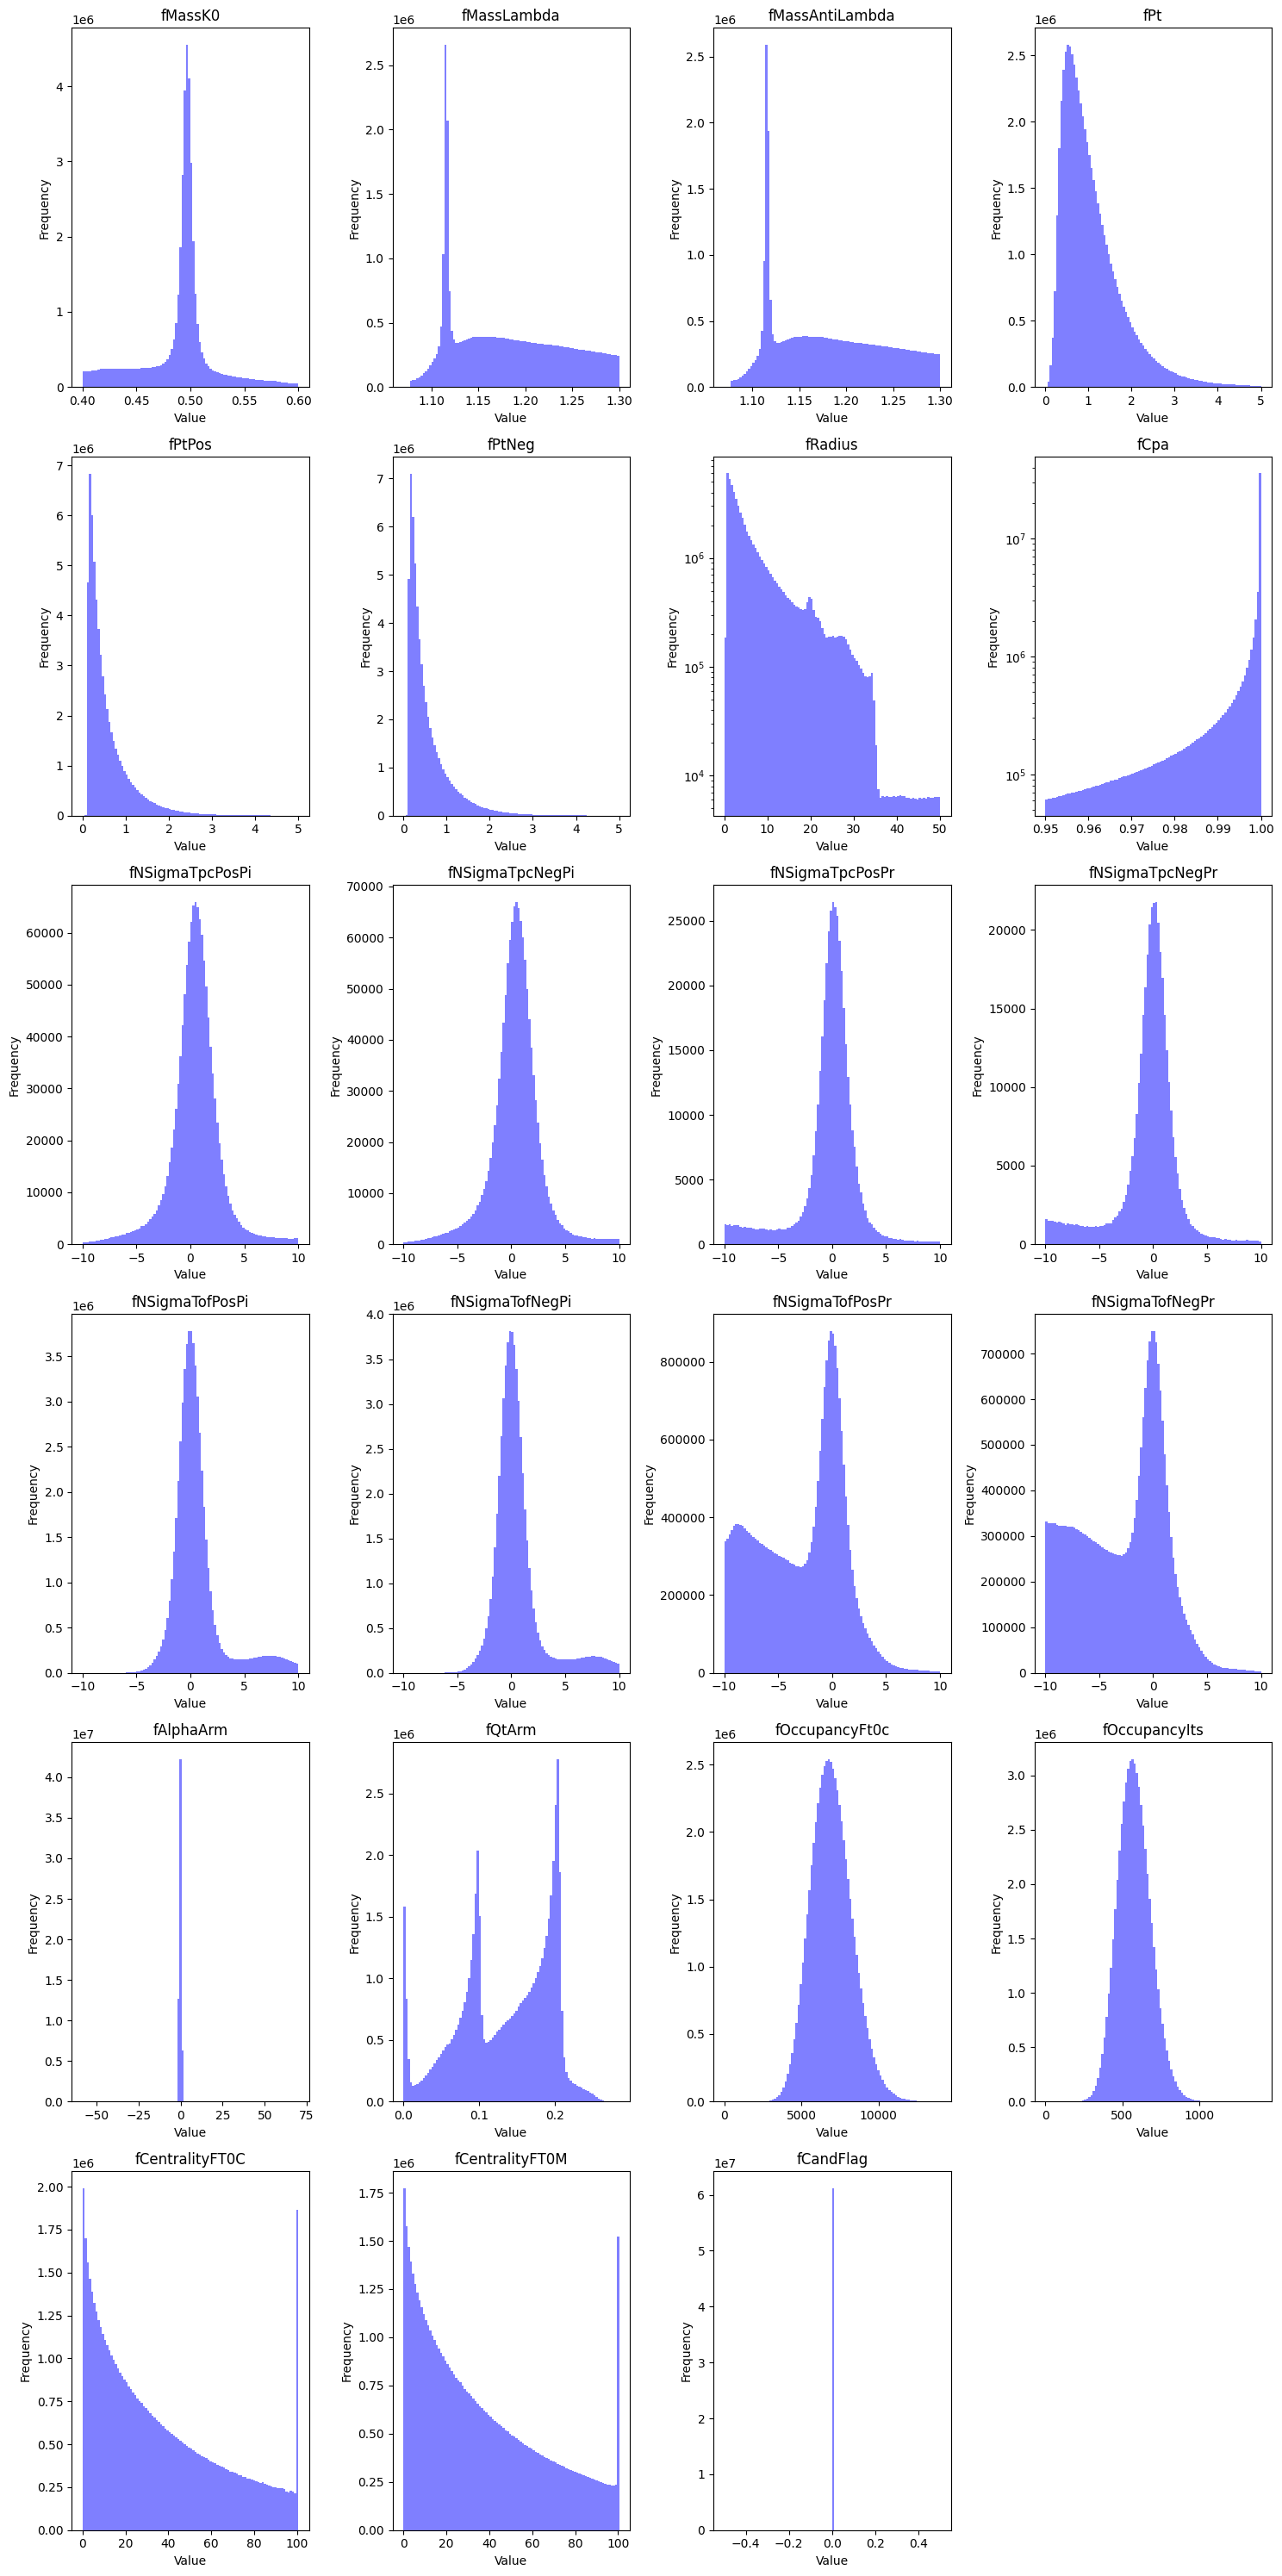

In [22]:
if df_data_pp != "": 
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(merged_df_data_pp.columns):
        axes[i].hist(merged_df_data_pp[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, color='blue')
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        if column in log_columns:
            axes[i].set_yscale('log')
    
    # Remove unused axes if any
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

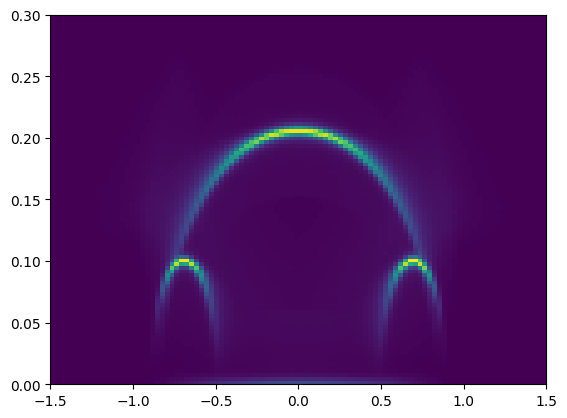

In [23]:
h, xedges, yedges, img = plt.hist2d(merged_df_data_pp["fAlphaArm"], merged_df_data_pp["fQtArm"], bins=(100, 100), range=((-1.5, 1.5), (0, 0.3)))
plt.show()

In [37]:
if df_data_pp != "": 
    sel_merged_df_data_pp = merged_df_data_pp.query("fCpa > 0.9999 and fMassK0 > 0.470 and fMassK0 < 0.525 and (fMassLambda < 1.114 or fMassLambda > 1.117) and (fMassAntiLambda < 1.114 or fMassAntiLambda > 1.117) and fQtArm >  0.12")
    print(f"[bef. sel.] Number of dataframe entries: {len(merged_df_data_pp)}")
    print(f"[aft. sel.] Number of dataframe entries: {len(sel_merged_df_data_pp)}")
    print(f"Dataframe columns: {sel_merged_df_data_pp.columns}")

[bef. sel.] Number of dataframe entries: 61222597
[aft. sel.] Number of dataframe entries: 13846626
Dataframe columns: Index(['fMassK0', 'fMassLambda', 'fMassAntiLambda', 'fPt', 'fPtPos', 'fPtNeg',
       'fRadius', 'fCpa', 'fNSigmaTpcPosPi', 'fNSigmaTpcNegPi',
       'fNSigmaTpcPosPr', 'fNSigmaTpcNegPr', 'fNSigmaTofPosPi',
       'fNSigmaTofNegPi', 'fNSigmaTofPosPr', 'fNSigmaTofNegPr', 'fAlphaArm',
       'fQtArm', 'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C',
       'fCentralityFT0M', 'fCandFlag'],
      dtype='object')


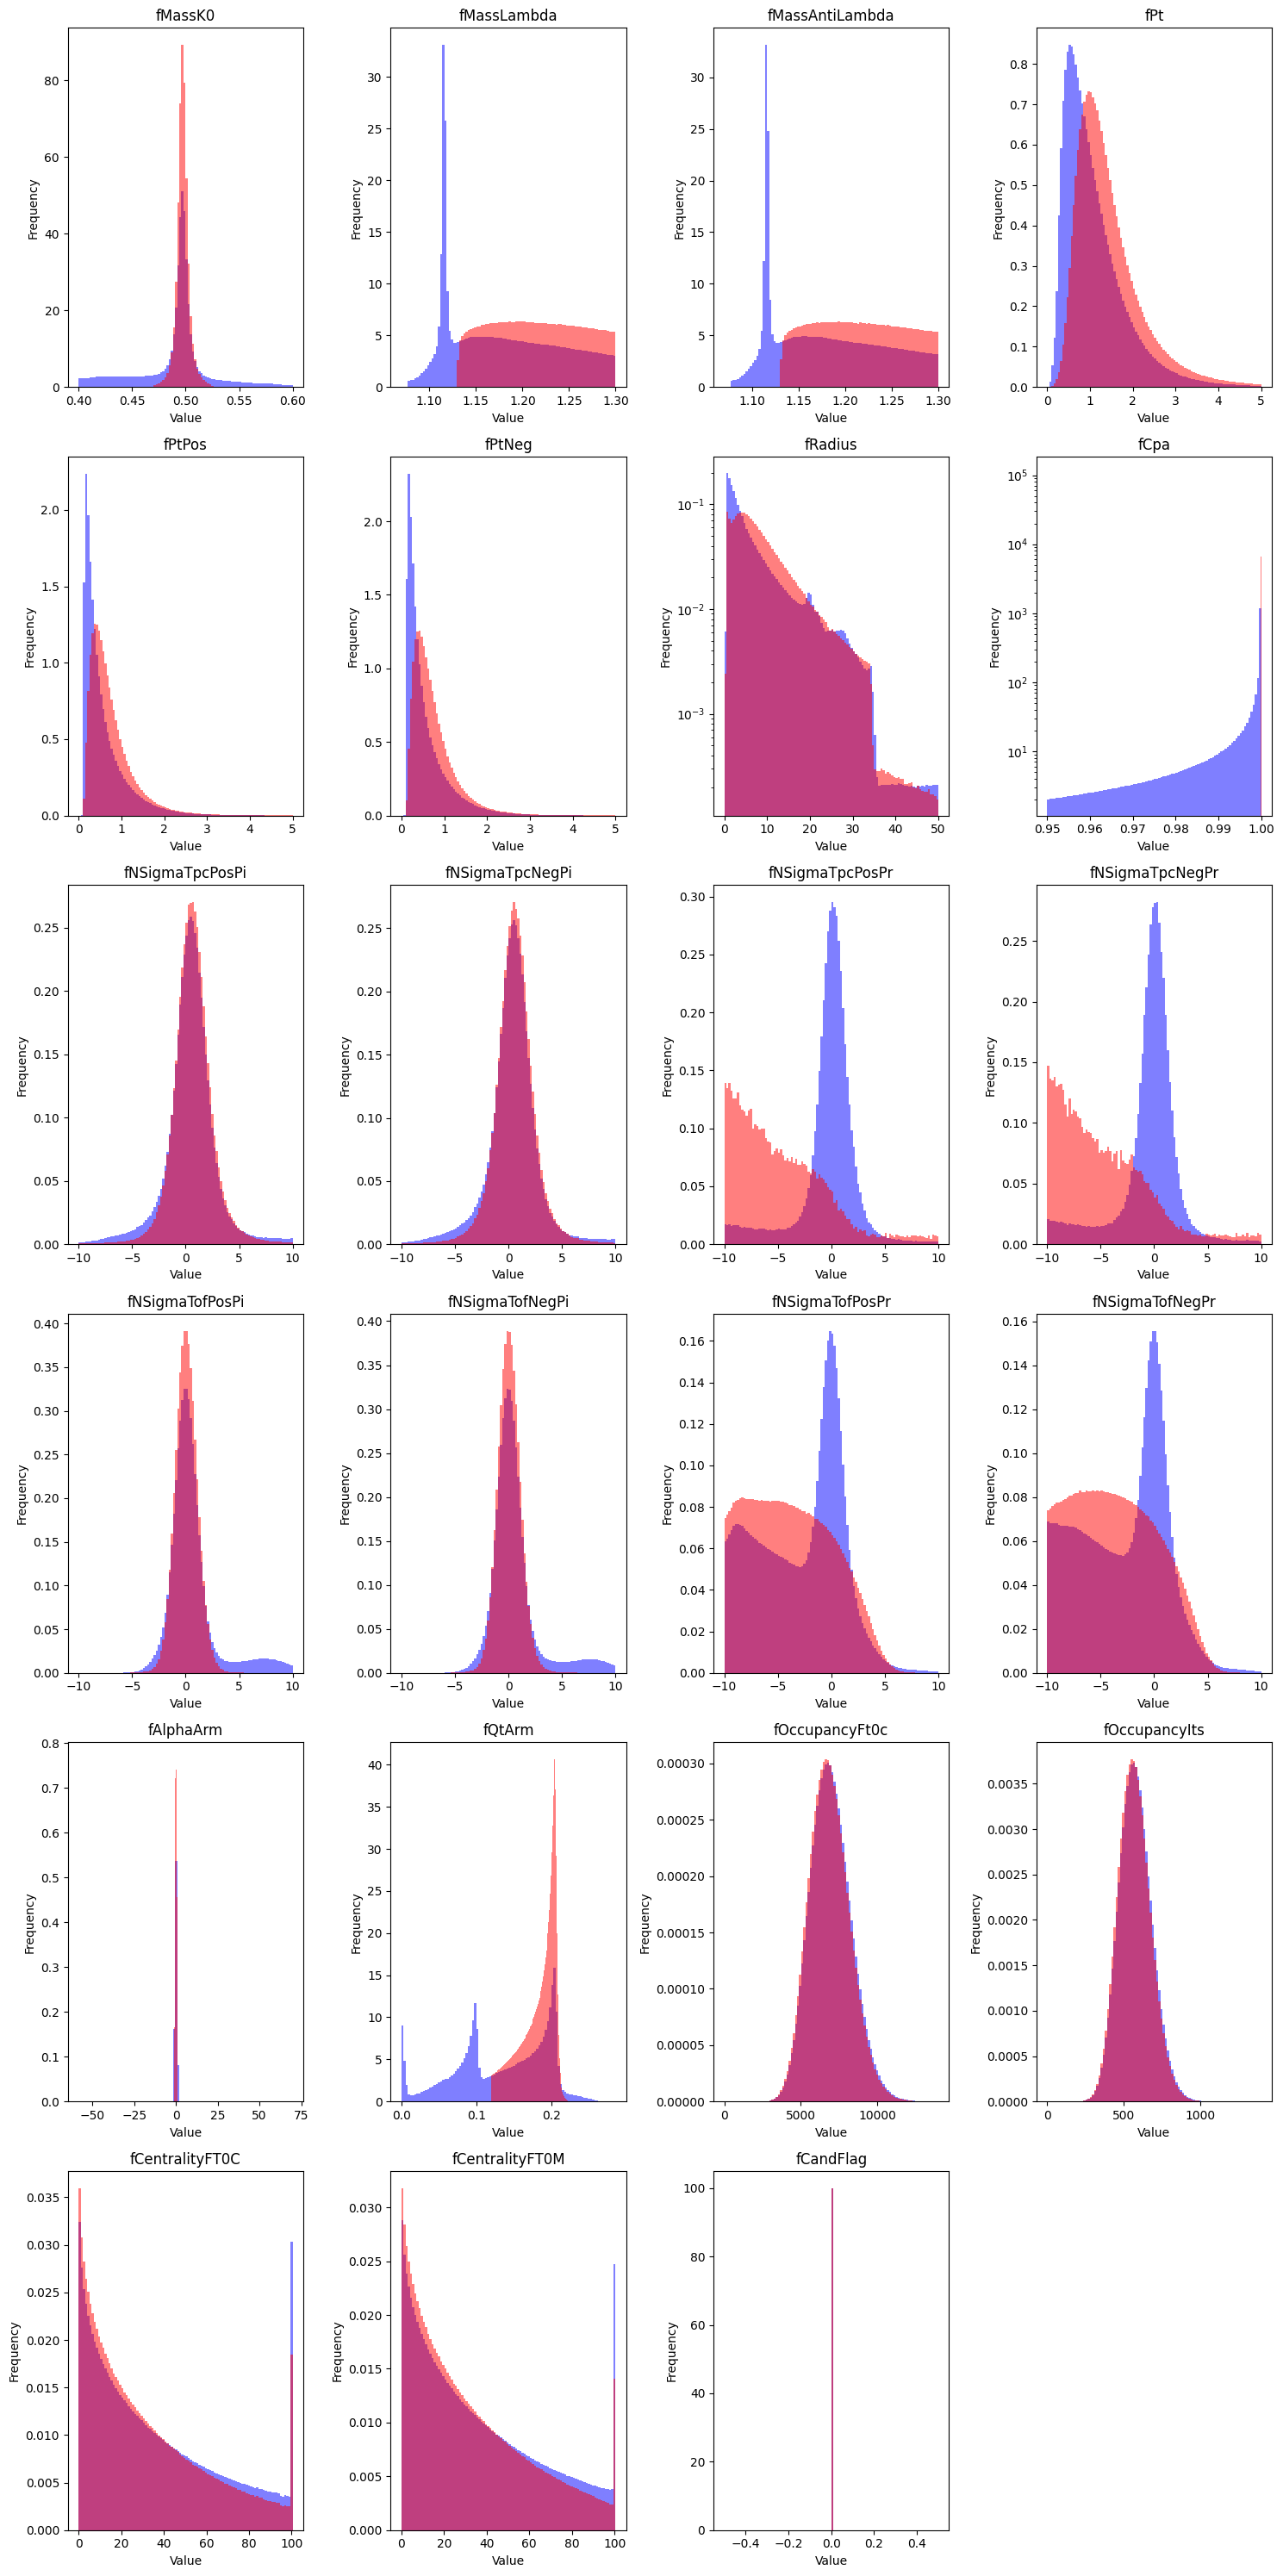

In [38]:
if df_data_pp != "": 
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(merged_df_data_pp.columns):
        axes[i].hist(merged_df_data_pp[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="before sel", color='blue', density=True)
        axes[i].hist(sel_merged_df_data_pp[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="after sel", color='red', density=True)
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        if column in log_columns:
            axes[i].set_yscale('log')

    # Remove unused axes if any
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

### PbPb

In [9]:
if df_data_pbpb != "":
    dfs_data_pbpb = []
    with uproot.open(df_data_pbpb) as f:
        print(f.keys())
        for iKey, key in enumerate(f.keys()):
            if 'pidv0s' in key:
                print(key)
                dfData = f[key].arrays(library='pd')
                dfs_data_pbpb.append(dfData)

    merged_df_data_pbpb = pd.concat([df for df in dfs_data_pbpb], ignore_index=True)
    print(f"Number of dataframe entries: {len(merged_df_data_pbpb)}")
    print(f"Dataframe columns: {merged_df_data_pbpb.columns}")

['DF_2336960460168000;1', 'DF_2336960460168000/O2pidv0s;1', 'DF_2336960460687552;1', 'DF_2336960460687552/O2pidv0s;1', 'DF_2336960460705440;1', 'DF_2336960460705440/O2pidv0s;1', 'DF_2336960461250624;1', 'DF_2336960461250624/O2pidv0s;1', 'DF_2336960462238752;1', 'DF_2336960462238752/O2pidv0s;1', 'DF_2336960462837632;1', 'DF_2336960462837632/O2pidv0s;1', 'DF_2336960463807072;1', 'DF_2336960463807072/O2pidv0s;1', 'DF_2336986332104544;1', 'DF_2336986332104544/O2pidv0s;1', 'DF_2336986333191936;1', 'DF_2336986333191936/O2pidv0s;1', 'DF_2336986334305792;1', 'DF_2336986334305792/O2pidv0s;1', 'DF_2336986335323680;1', 'DF_2336986335323680/O2pidv0s;1', 'DF_2336986335433920;1', 'DF_2336986335433920/O2pidv0s;1', 'DF_2336986337600480;1', 'DF_2336986337600480/O2pidv0s;1', 'DF_2336986338585184;1', 'DF_2336986338585184/O2pidv0s;1', 'DF_2336986338678464;1', 'DF_2336986338678464/O2pidv0s;1', 'DF_2336986339774368;1', 'DF_2336986339774368/O2pidv0s;1', 'DF_2336986340878784;1', 'DF_2336986340878784/O2pidv0s;

DF_2336960460687552/O2pidv0s;1
DF_2336960460705440/O2pidv0s;1
DF_2336960461250624/O2pidv0s;1
DF_2336960462238752/O2pidv0s;1
DF_2336960462837632/O2pidv0s;1
DF_2336960463807072/O2pidv0s;1
DF_2336986332104544/O2pidv0s;1
DF_2336986333191936/O2pidv0s;1
DF_2336986334305792/O2pidv0s;1
DF_2336986335323680/O2pidv0s;1
DF_2336986335433920/O2pidv0s;1
DF_2336986337600480/O2pidv0s;1
DF_2336986338585184/O2pidv0s;1
DF_2336986338678464/O2pidv0s;1
DF_2336986339774368/O2pidv0s;1
DF_2336986340878784/O2pidv0s;1
DF_2336986341989024/O2pidv0s;1
DF_2336986344210336/O2pidv0s;1
DF_2336986345333664/O2pidv0s;1
DF_2336986346459040/O2pidv0s;1
DF_2336986346611328/O2pidv0s;1
DF_2336986347763808/O2pidv0s;1
DF_2336986349042176/O2pidv0s;1
DF_2336986351180992/O2pidv0s;1
DF_2336986352355520/O2pidv0s;1
DF_2336986353526112/O2pidv0s;1
DF_2336986354722048/O2pidv0s;1
DF_2336986356124576/O2pidv0s;1
DF_2336986357340480/O2pidv0s;1
DF_2336986358564000/O2pidv0s;1
DF_2336986359762272/O2pidv0s;1
DF_2336986362196480/O2pidv0s;1
DF_23369

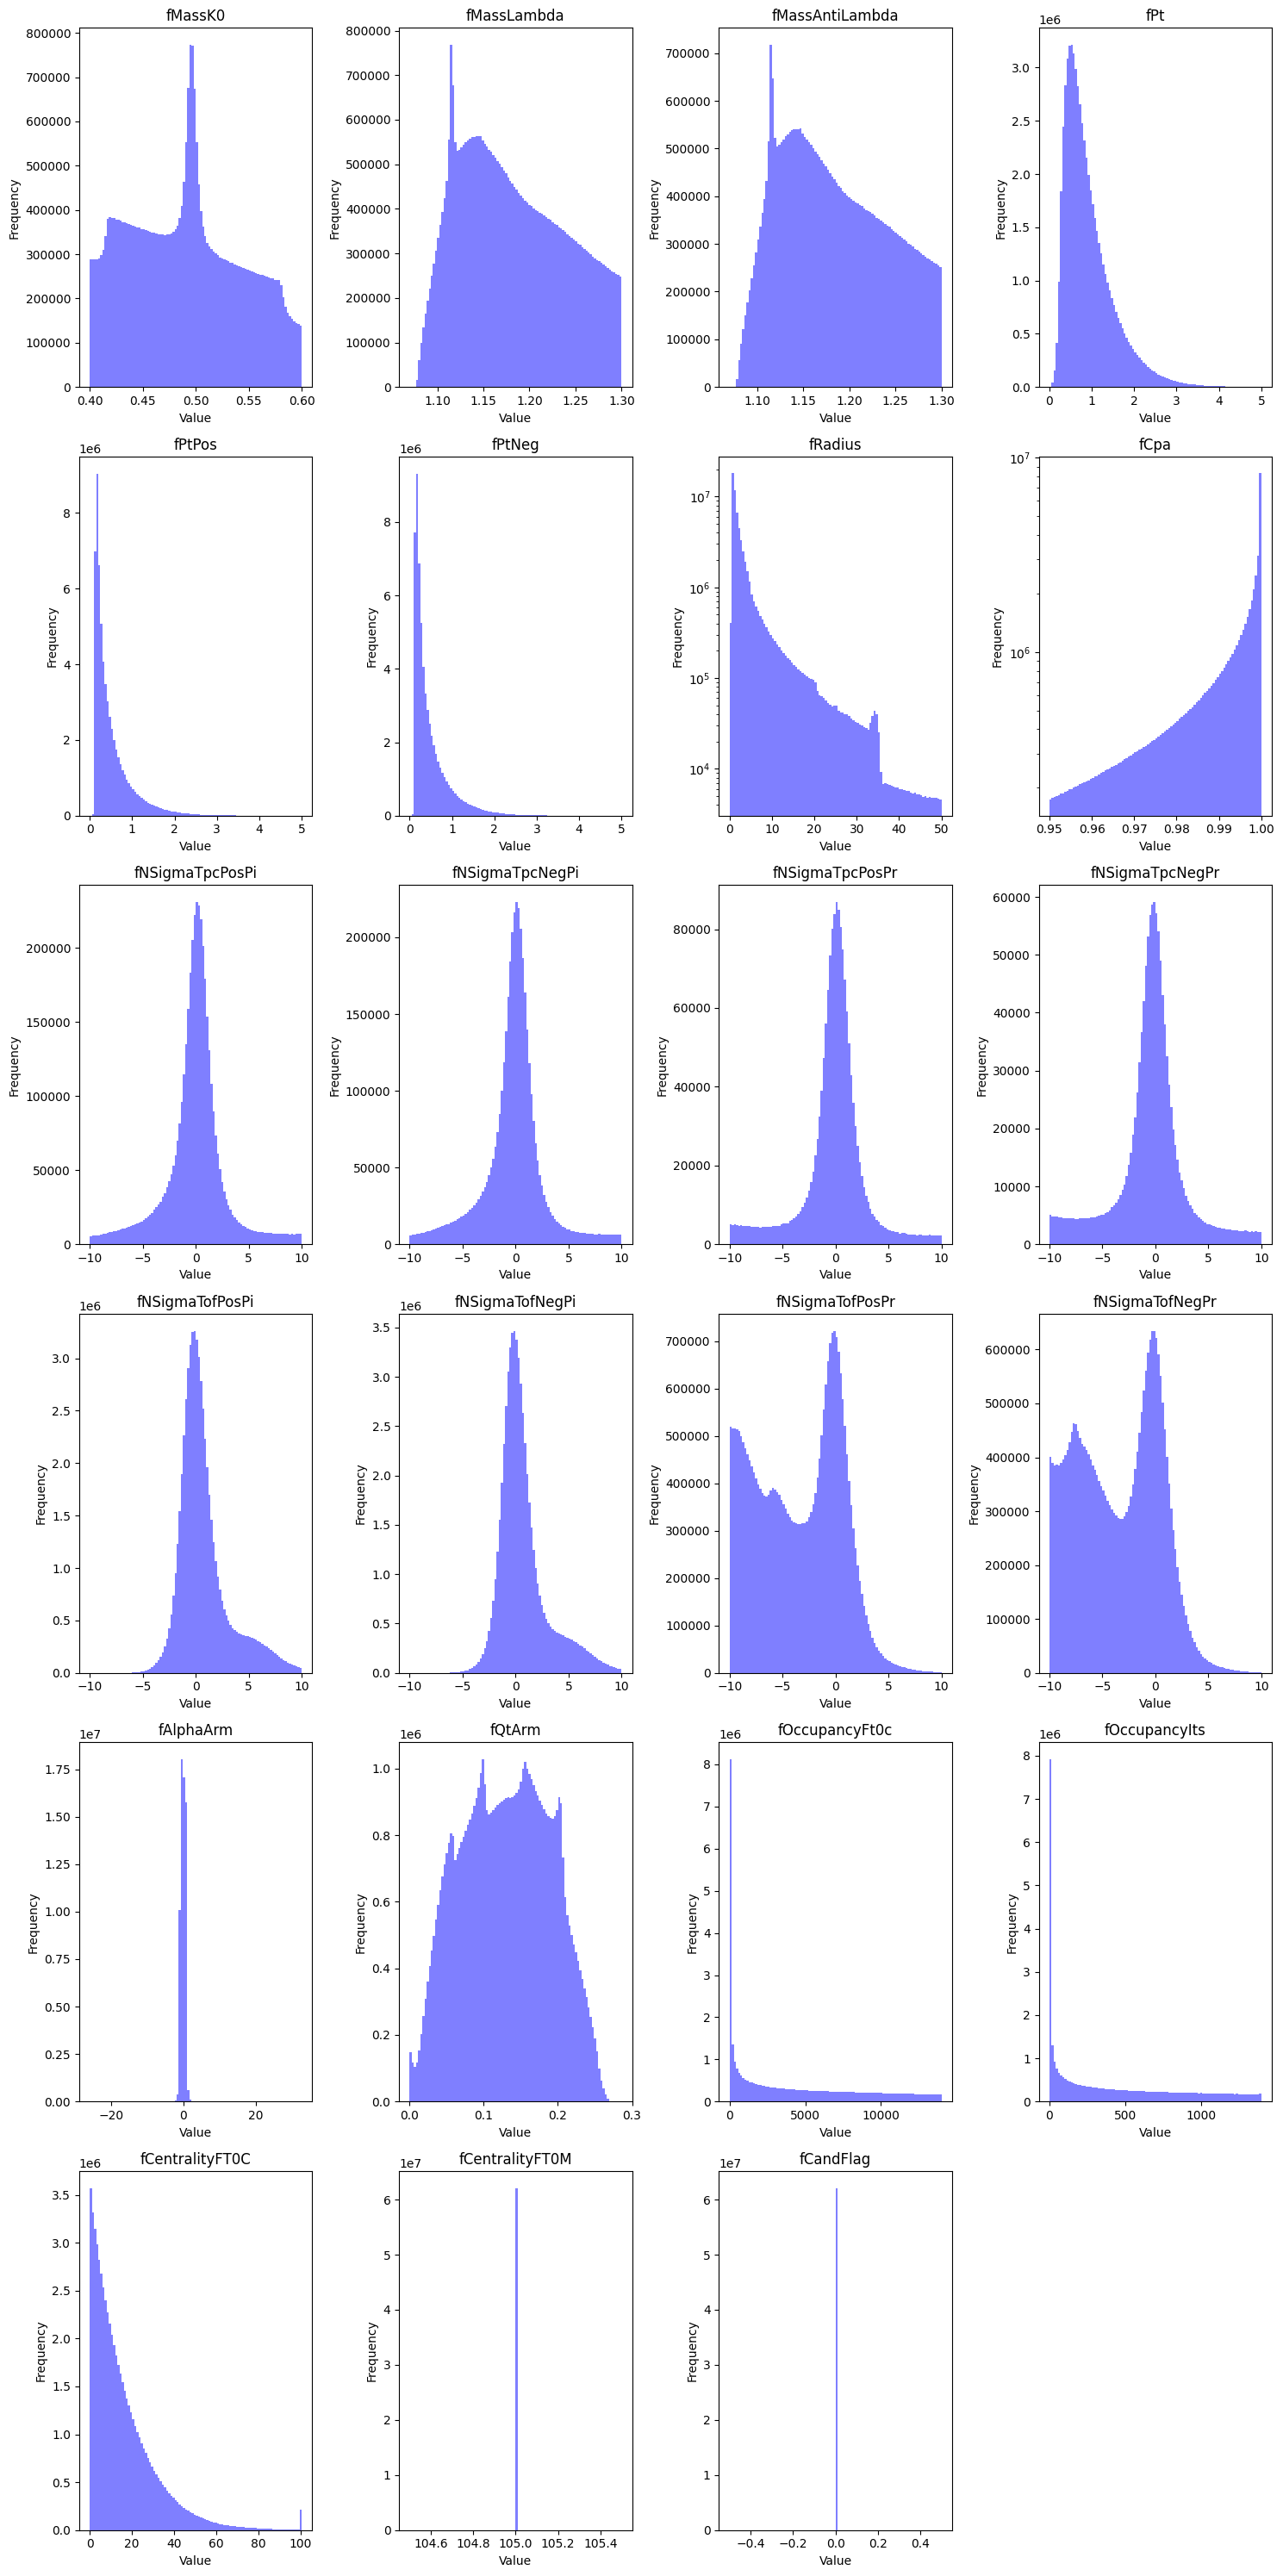

In [10]:
if df_data_pbpb != "":
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(merged_df_data_pbpb.columns):
        axes[i].hist(merged_df_data_pbpb[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, color='blue')
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        if column in log_columns:
            axes[i].set_yscale('log')
    
    # Remove unused axes if any
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

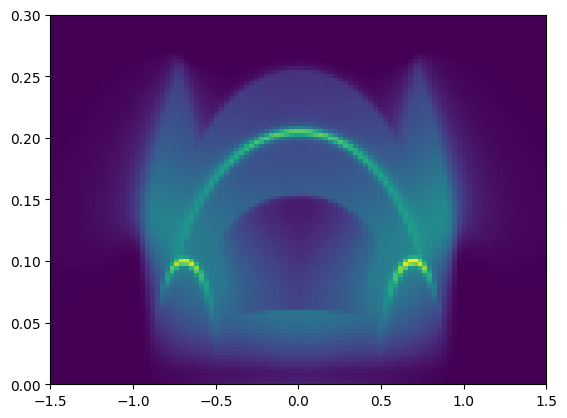

In [11]:
h, xedges, yedges, img = plt.hist2d(merged_df_data_pbpb["fAlphaArm"], merged_df_data_pbpb["fQtArm"], bins=(100, 100), range=((-1.5, 1.5), (0, 0.3)))
plt.show()

In [12]:
if df_data_pbpb != "":
    sel_merged_df_data_pbpb = merged_df_data_pbpb.query("fCpa > 0.9999 and fMassK0 > 0.470 and fMassK0 < 0.525 and (fMassLambda < 1.114 or fMassLambda > 1.117) and (fMassAntiLambda < 1.114 or fMassAntiLambda > 1.117) and fQtArm >  0.12")
    print(f"[bef. sel.] Number of dataframe entries: {len(merged_df_data_pbpb)}")
    print(f"[aft. sel.] Number of dataframe entries: {len(sel_merged_df_data_pbpb)}")
    print(f"Dataframe columns: {sel_merged_df_data_pbpb.columns}")

[bef. sel.] Number of dataframe entries: 62091865
[aft. sel.] Number of dataframe entries: 1703060
Dataframe columns: Index(['fMassK0', 'fMassLambda', 'fMassAntiLambda', 'fPt', 'fPtPos', 'fPtNeg',
       'fRadius', 'fCpa', 'fNSigmaTpcPosPi', 'fNSigmaTpcNegPi',
       'fNSigmaTpcPosPr', 'fNSigmaTpcNegPr', 'fNSigmaTofPosPi',
       'fNSigmaTofNegPi', 'fNSigmaTofPosPr', 'fNSigmaTofNegPr', 'fAlphaArm',
       'fQtArm', 'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C',
       'fCentralityFT0M', 'fCandFlag'],
      dtype='object')


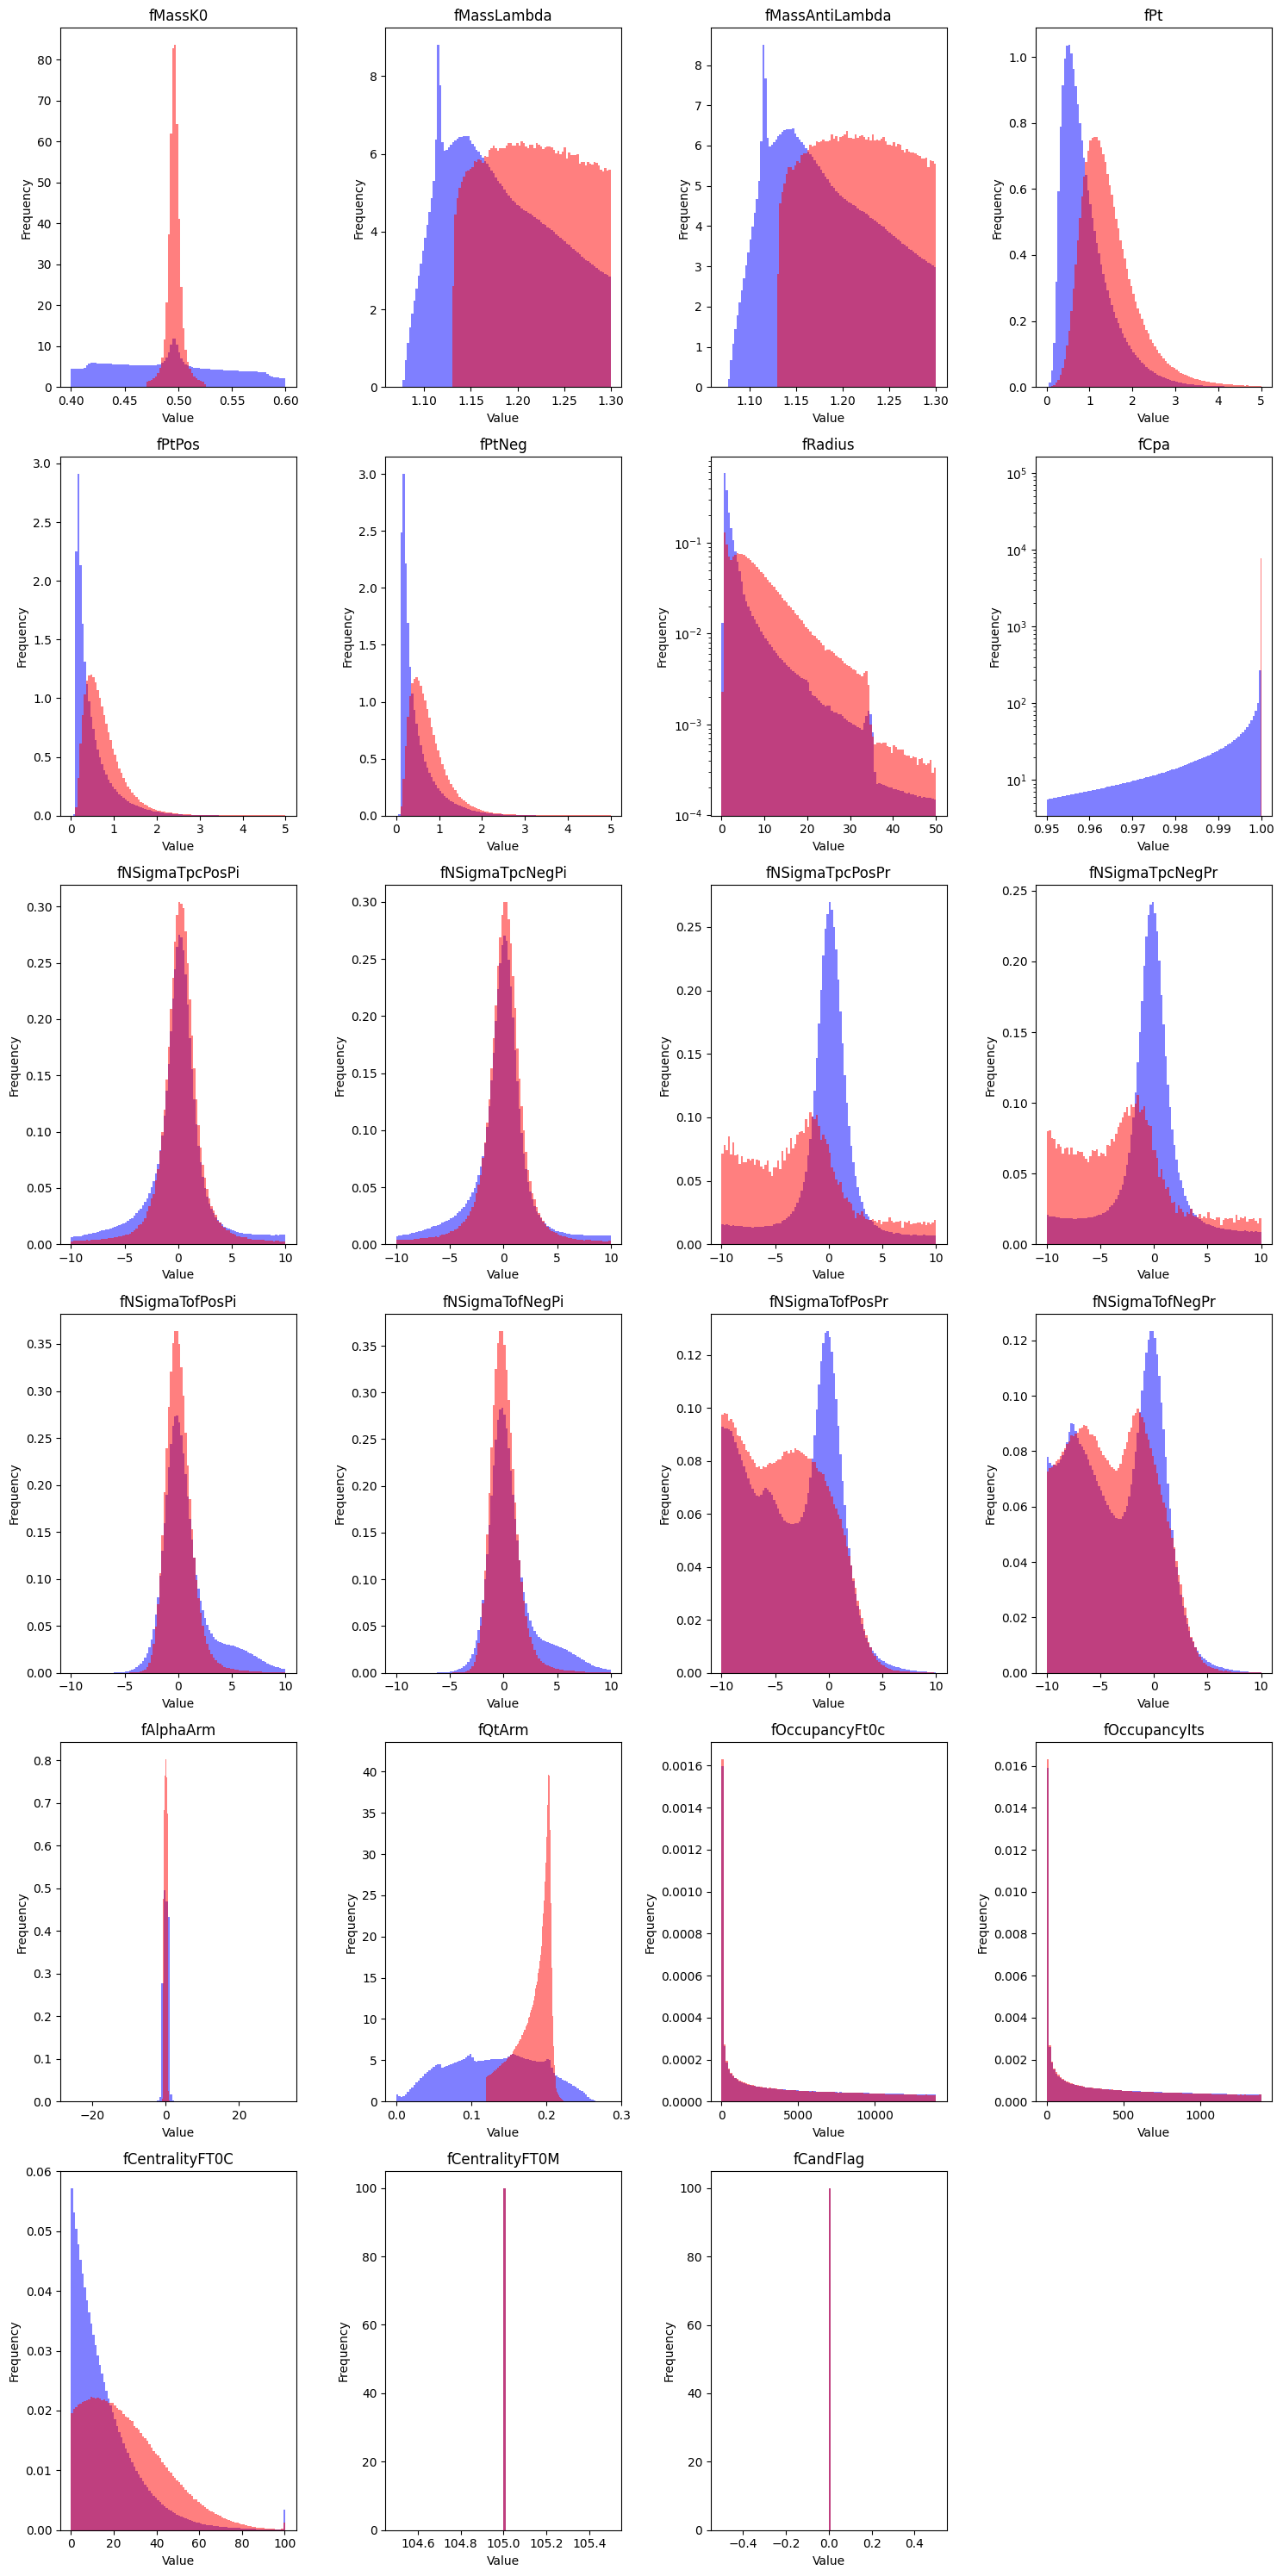

In [13]:
if df_data_pbpb != "":
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(merged_df_data_pbpb.columns):
        axes[i].hist(merged_df_data_pbpb[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="before sel", color='blue', density=True)
        axes[i].hist(sel_merged_df_data_pbpb[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="after sel", color='red', density=True)
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        if column in log_columns:
            axes[i].set_yscale('log')
    
    # Remove unused axes if any
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

# MC

### pp

In [40]:
if df_mc_pp != "": 
    dfs_mc_pp = []
    with uproot.open(df_mc_pp) as f:
        print(f.keys())
        for iKey, key in enumerate(f.keys()):
            if 'pidv0s' in key:
                print(key)
                dfData = f[key].arrays(library='pd')
                dfs_mc_pp.append(dfData)

    merged_df_mc_pp = pd.concat([df for df in dfs_mc_pp], ignore_index=True)
    print(f"Number of dataframe entries: {len(merged_df_mc_pp)}")
    print(f"Dataframe columns: {merged_df_mc_pp.columns}")

['DF_2261906078578295;1', 'DF_2261906078578295/O2pidcascades;1', 'DF_2261906078578295/O2pidv0s;1']
DF_2261906078578295/O2pidv0s;1
Number of dataframe entries: 55456075
Dataframe columns: Index(['fMassK0', 'fMassLambda', 'fMassAntiLambda', 'fPt', 'fPtPos', 'fPtNeg',
       'fRadius', 'fCpa', 'fNSigmaTpcPosPi', 'fNSigmaTpcNegPi',
       'fNSigmaTpcPosPr', 'fNSigmaTpcNegPr', 'fNSigmaTofPosPi',
       'fNSigmaTofNegPi', 'fNSigmaTofPosPr', 'fNSigmaTofNegPr', 'fAlphaArm',
       'fQtArm', 'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C',
       'fCentralityFT0M', 'fCandFlag'],
      dtype='object')


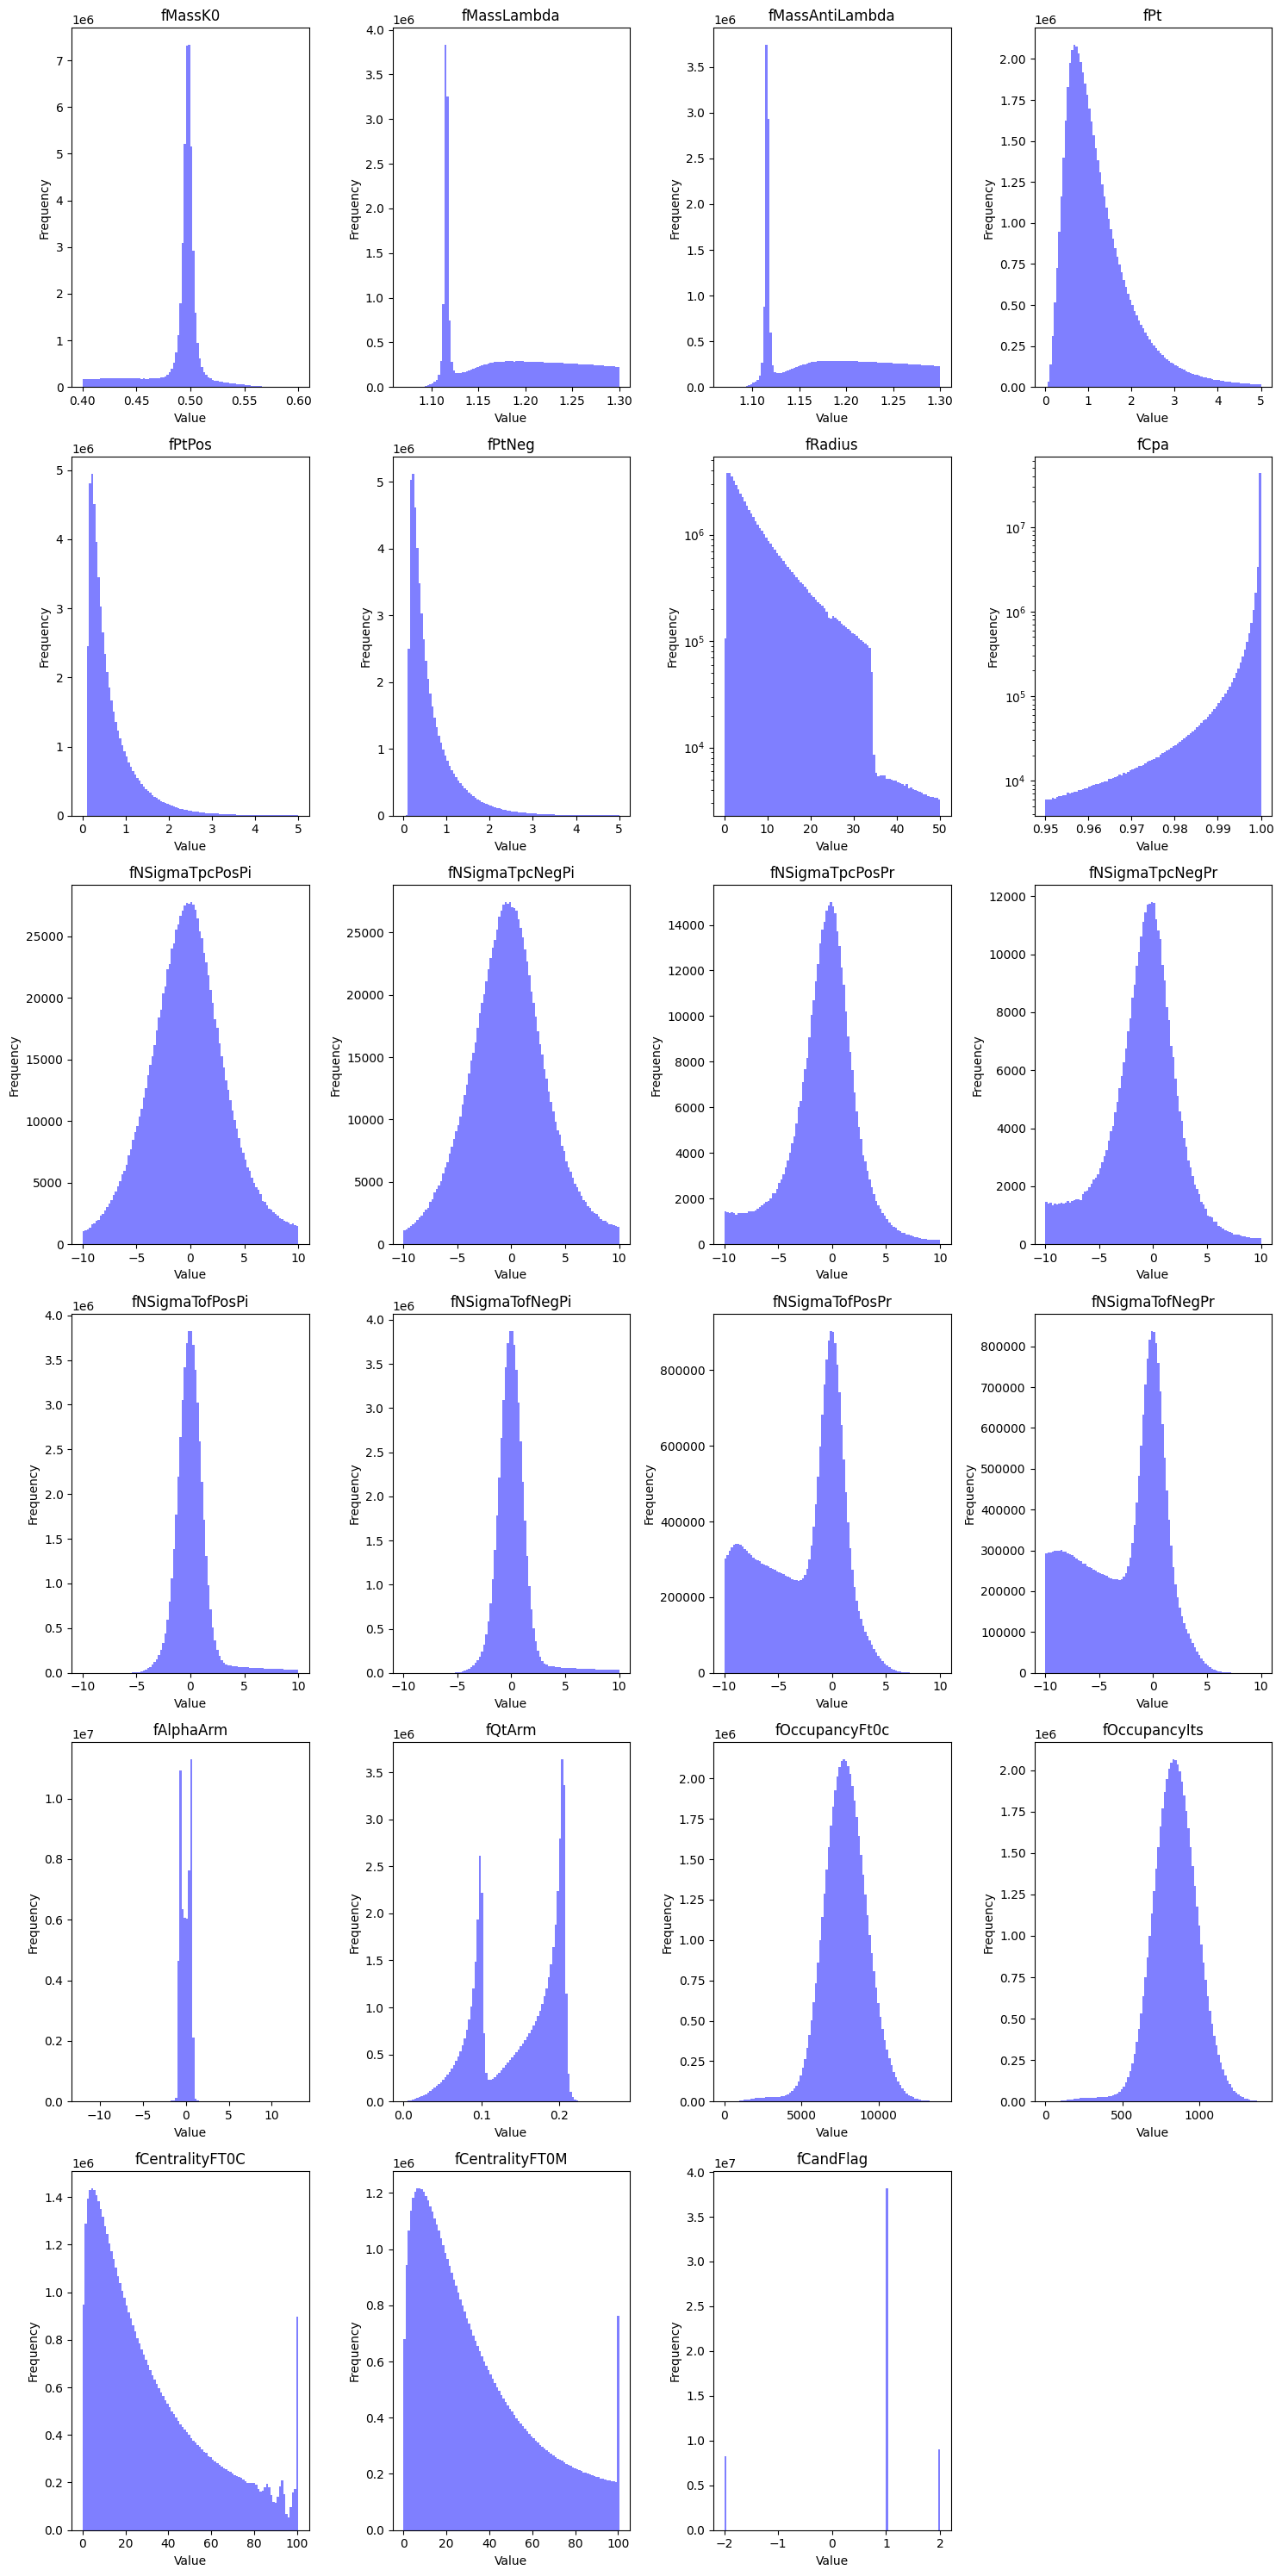

In [41]:
if df_mc_pp != "":
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(merged_df_mc_pp.columns):
        axes[i].hist(merged_df_mc_pp[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, color='blue')
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        if column in log_columns:
            axes[i].set_yscale('log')

    # Remove unused axes if any
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

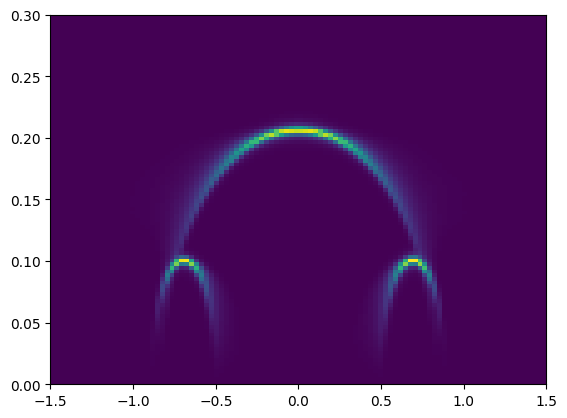

In [42]:
h, xedges, yedges, img = plt.hist2d(merged_df_mc_pp["fAlphaArm"], merged_df_mc_pp["fQtArm"], bins=(100, 100), range=((-1.5, 1.5), (0, 0.3)))
plt.show()

In [43]:
if df_mc_pp != "": 
    sel_merged_df_mc_pp = merged_df_mc_pp.query("fCandFlag == 1")
    print(f"[bef. sel.] Number of dataframe entries: {len(merged_df_mc_pp)}")
    print(f"[aft. sel.] Number of dataframe entries: {len(sel_merged_df_mc_pp)}")
    print(f"Dataframe columns: {sel_merged_df_mc_pp.columns}")

[bef. sel.] Number of dataframe entries: 55456075
[aft. sel.] Number of dataframe entries: 38206236
Dataframe columns: Index(['fMassK0', 'fMassLambda', 'fMassAntiLambda', 'fPt', 'fPtPos', 'fPtNeg',
       'fRadius', 'fCpa', 'fNSigmaTpcPosPi', 'fNSigmaTpcNegPi',
       'fNSigmaTpcPosPr', 'fNSigmaTpcNegPr', 'fNSigmaTofPosPi',
       'fNSigmaTofNegPi', 'fNSigmaTofPosPr', 'fNSigmaTofNegPr', 'fAlphaArm',
       'fQtArm', 'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C',
       'fCentralityFT0M', 'fCandFlag'],
      dtype='object')


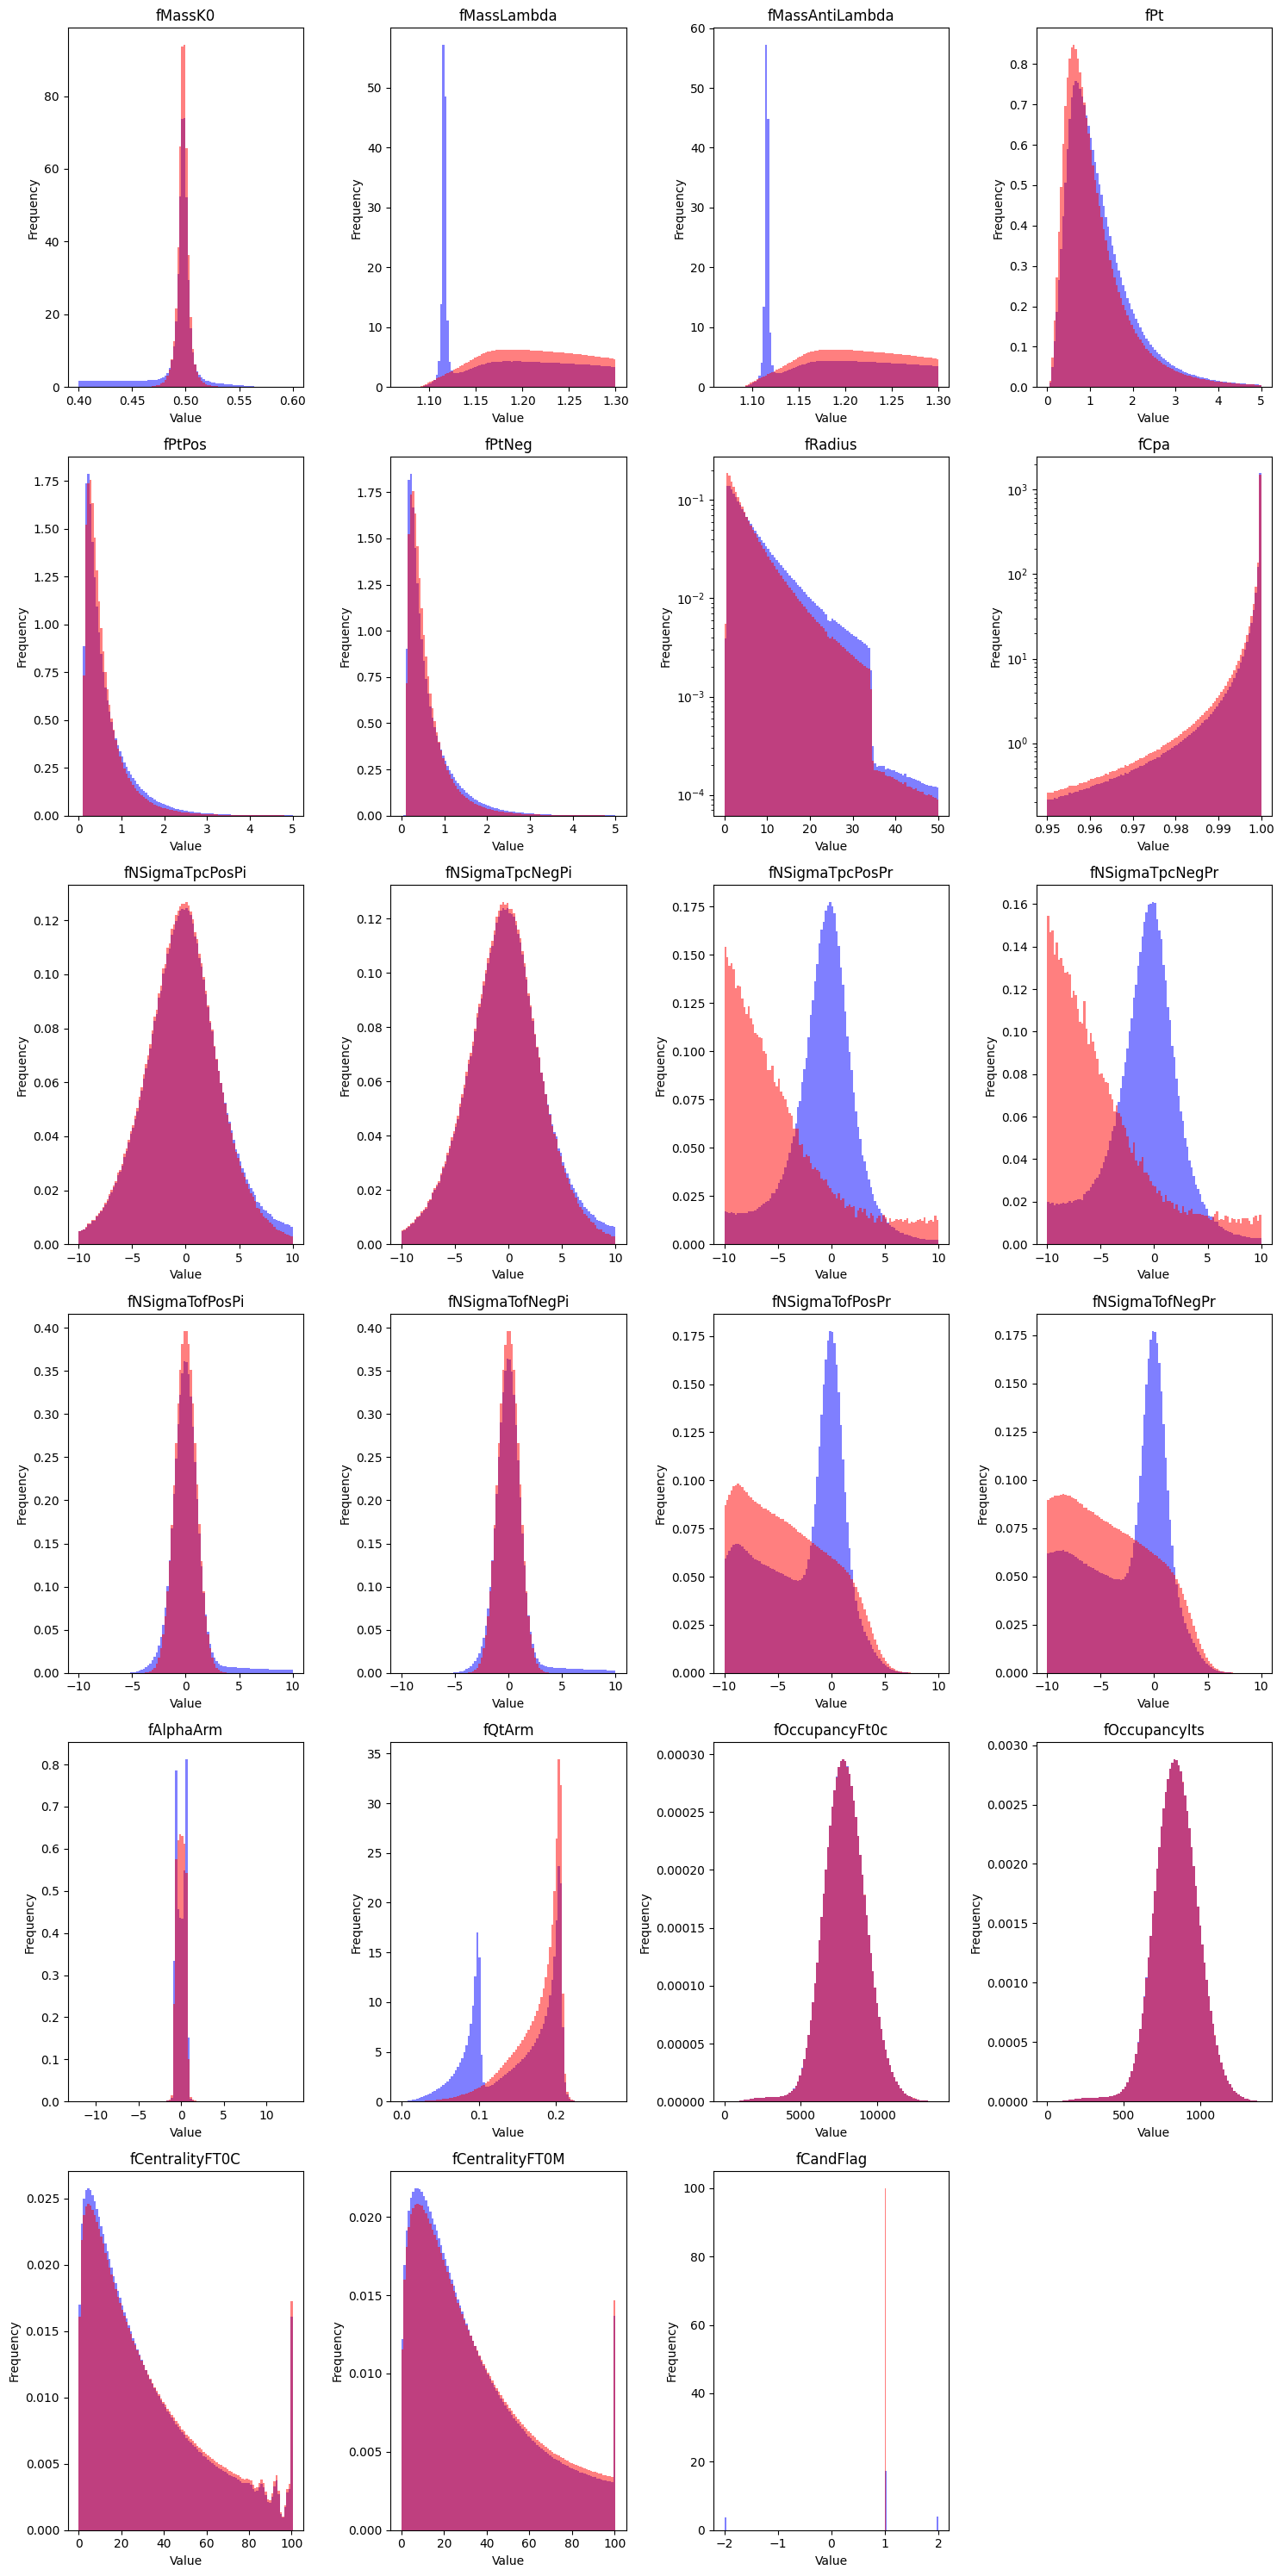

In [44]:
if df_mc_pp != "":
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(merged_df_mc_pp.columns):
        axes[i].hist(merged_df_mc_pp[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="before sel", color='blue', density=True)
        axes[i].hist(sel_merged_df_mc_pp[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="after sel", color='red', density=True)
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        if column in log_columns:
            axes[i].set_yscale('log')

    # Remove unused axes if any
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

### PbPb

In [47]:
if df_mc_pbpb != "": 
    dfs_mc_pbpb = []
    with uproot.open(df_mc_pbpb) as f:
        print(f.keys())
        for iKey, key in enumerate(f.keys()):
            if 'pidv0s' in key:
                print(key)
                dfData = f[key].arrays(library='pd')
                dfs_mc_pbpb.append(dfData)

    merged_df_mc_pbpb = pd.concat([df for df in dfs_mc_pbpb], ignore_index=True)
    print(f"Number of dataframe entries: {len(merged_df_mc_pbpb)}")
    print(f"Dataframe columns: {merged_df_mc_pbpb.columns}")

['DF_2336986331393818;1', 'DF_2336986331393818/O2pidv0s;1']
DF_2336986331393818/O2pidv0s;1
Number of dataframe entries: 25234
Dataframe columns: Index(['fMassK0', 'fMassLambda', 'fMassAntiLambda', 'fPt', 'fPtPos', 'fPtNeg',
       'fRadius', 'fCpa', 'fNSigmaTpcPosPi', 'fNSigmaTpcNegPi',
       'fNSigmaTpcPosPr', 'fNSigmaTpcNegPr', 'fNSigmaTofPosPi',
       'fNSigmaTofNegPi', 'fNSigmaTofPosPr', 'fNSigmaTofNegPr', 'fAlphaArm',
       'fQtArm', 'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C',
       'fCentralityFT0M', 'fCandFlag'],
      dtype='object')


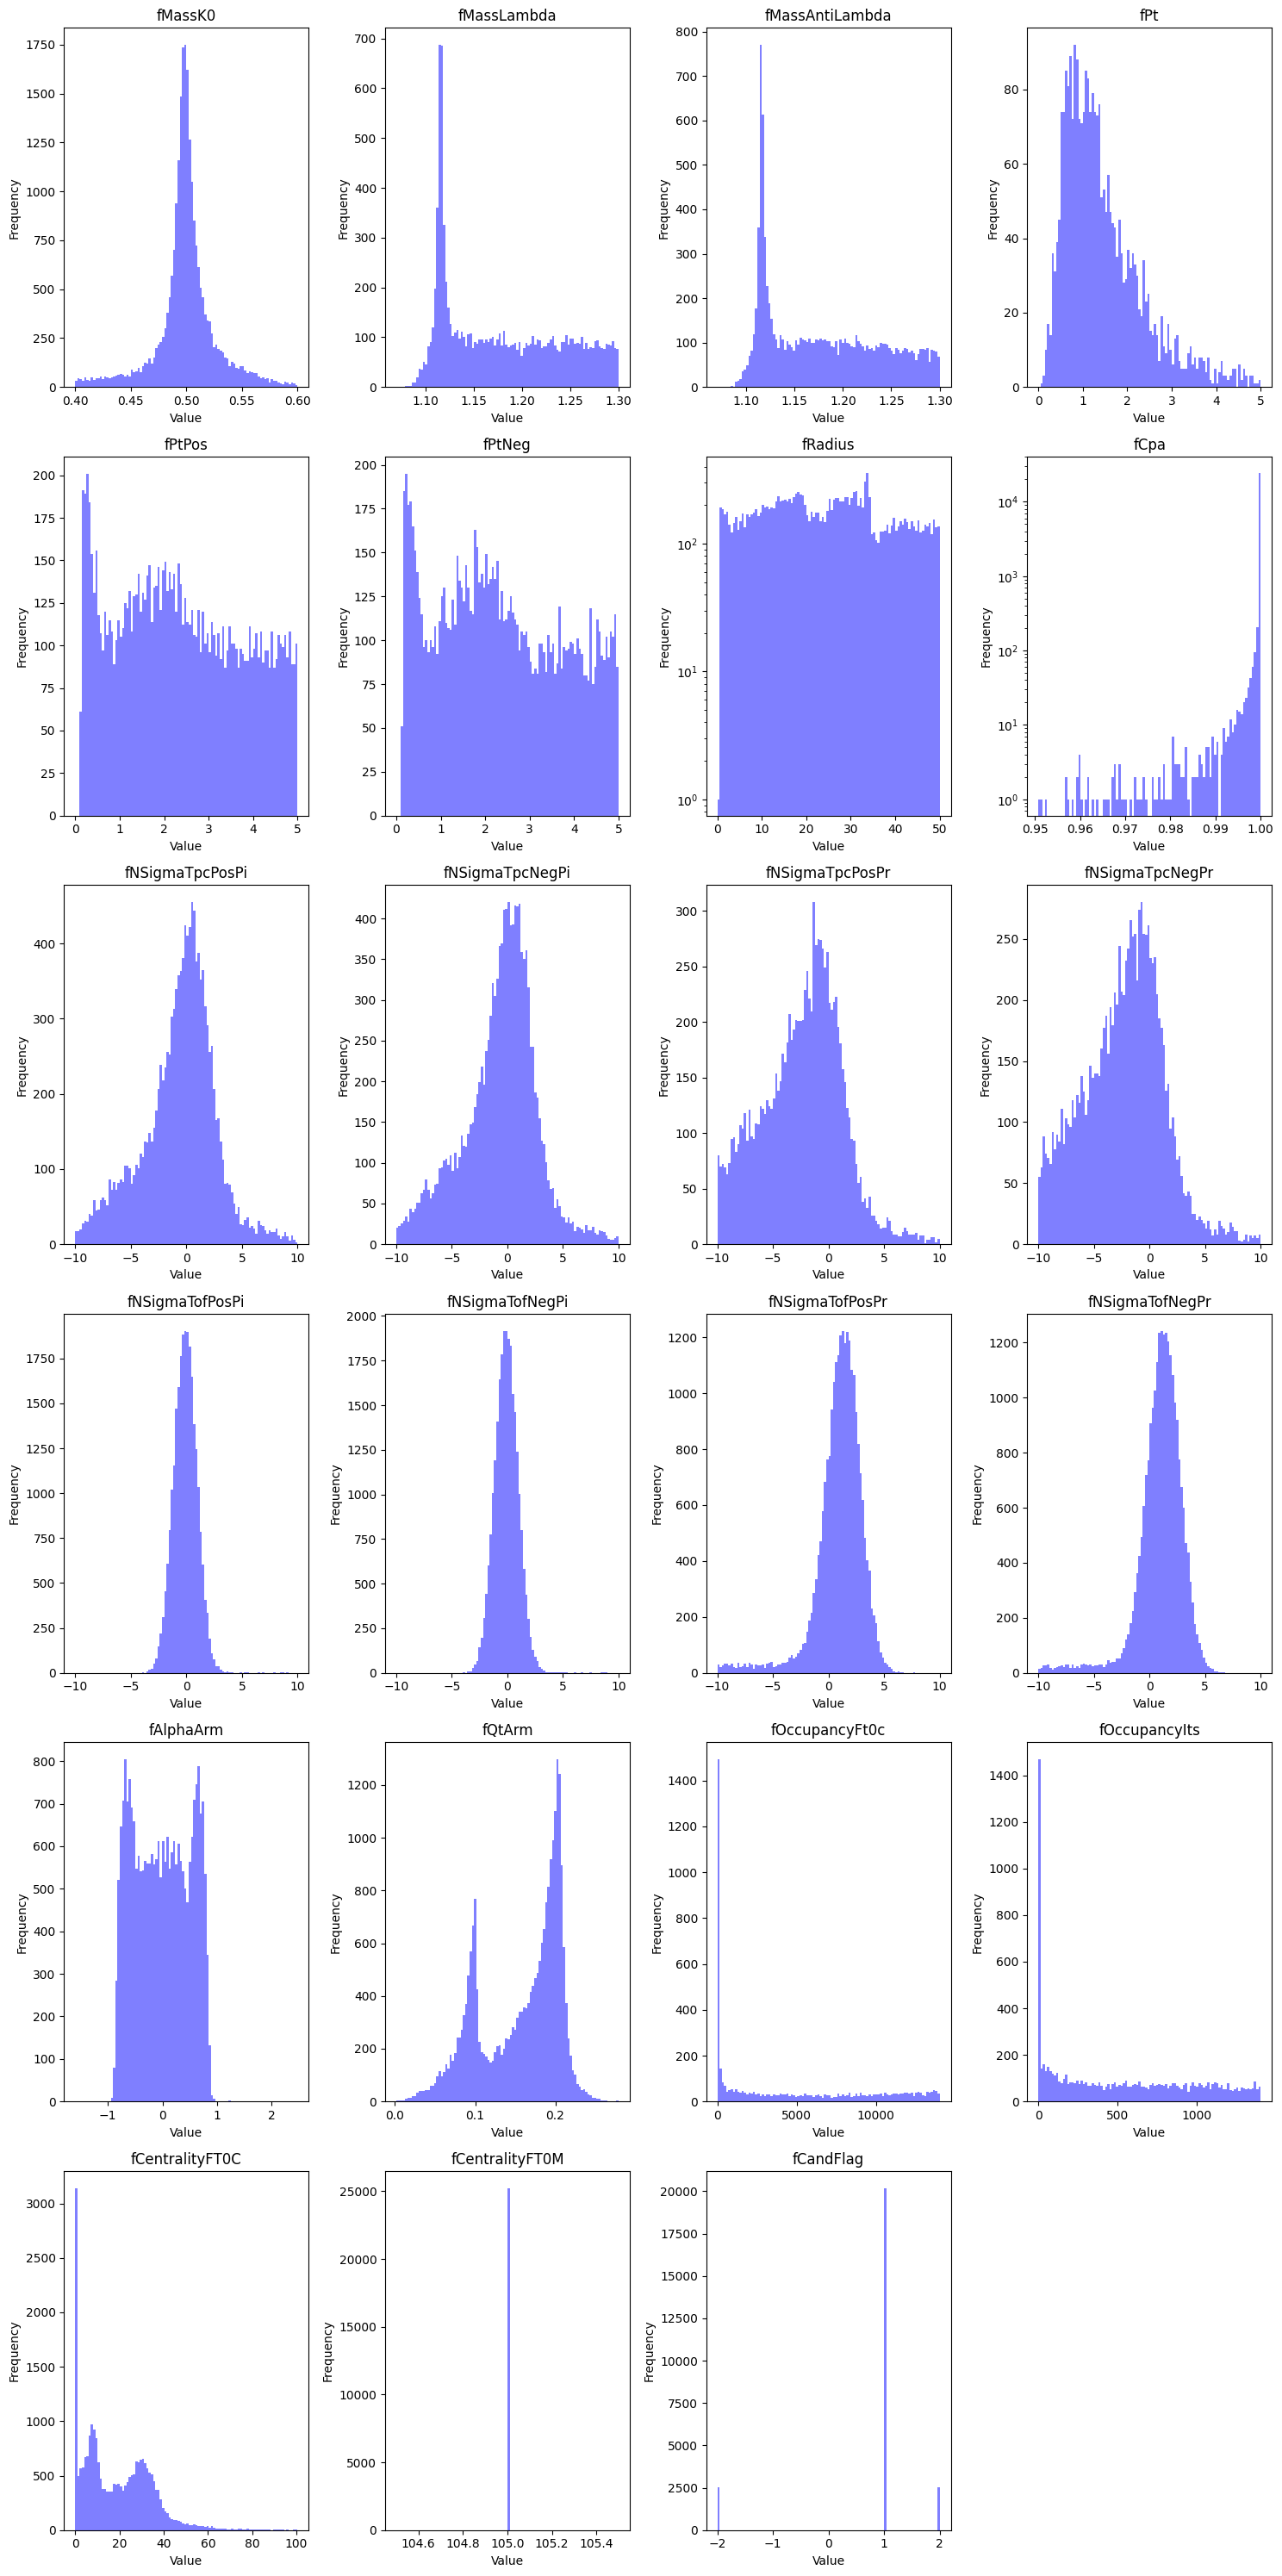

In [48]:
if df_mc_pbpb != "":
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(merged_df_mc_pbpb.columns):
        axes[i].hist(merged_df_mc_pbpb[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, color='blue')
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        if column in log_columns:
            axes[i].set_yscale('log')
    
    # Remove unused axes if any
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

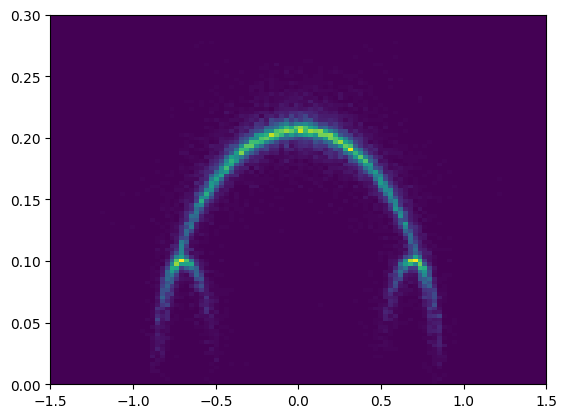

In [49]:
h, xedges, yedges, img = plt.hist2d(merged_df_mc_pbpb["fAlphaArm"], merged_df_mc_pbpb["fQtArm"], bins=(100, 100), range=((-1.5, 1.5), (0, 0.3)))
plt.show()

In [50]:
if df_mc_pbpb != "":
    sel_merged_df_mc_pbpb = merged_df_mc_pbpb.query("fCandFlag == 1")
    print(f"[bef. sel.] Number of dataframe entries: {len(merged_df_mc_pbpb)}")
    print(f"[aft. sel.] Number of dataframe entries: {len(sel_merged_df_mc_pbpb)}")
    print(f"Dataframe columns: {sel_merged_df_mc_pbpb.columns}")

[bef. sel.] Number of dataframe entries: 25234
[aft. sel.] Number of dataframe entries: 20193
Dataframe columns: Index(['fMassK0', 'fMassLambda', 'fMassAntiLambda', 'fPt', 'fPtPos', 'fPtNeg',
       'fRadius', 'fCpa', 'fNSigmaTpcPosPi', 'fNSigmaTpcNegPi',
       'fNSigmaTpcPosPr', 'fNSigmaTpcNegPr', 'fNSigmaTofPosPi',
       'fNSigmaTofNegPi', 'fNSigmaTofPosPr', 'fNSigmaTofNegPr', 'fAlphaArm',
       'fQtArm', 'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C',
       'fCentralityFT0M', 'fCandFlag'],
      dtype='object')


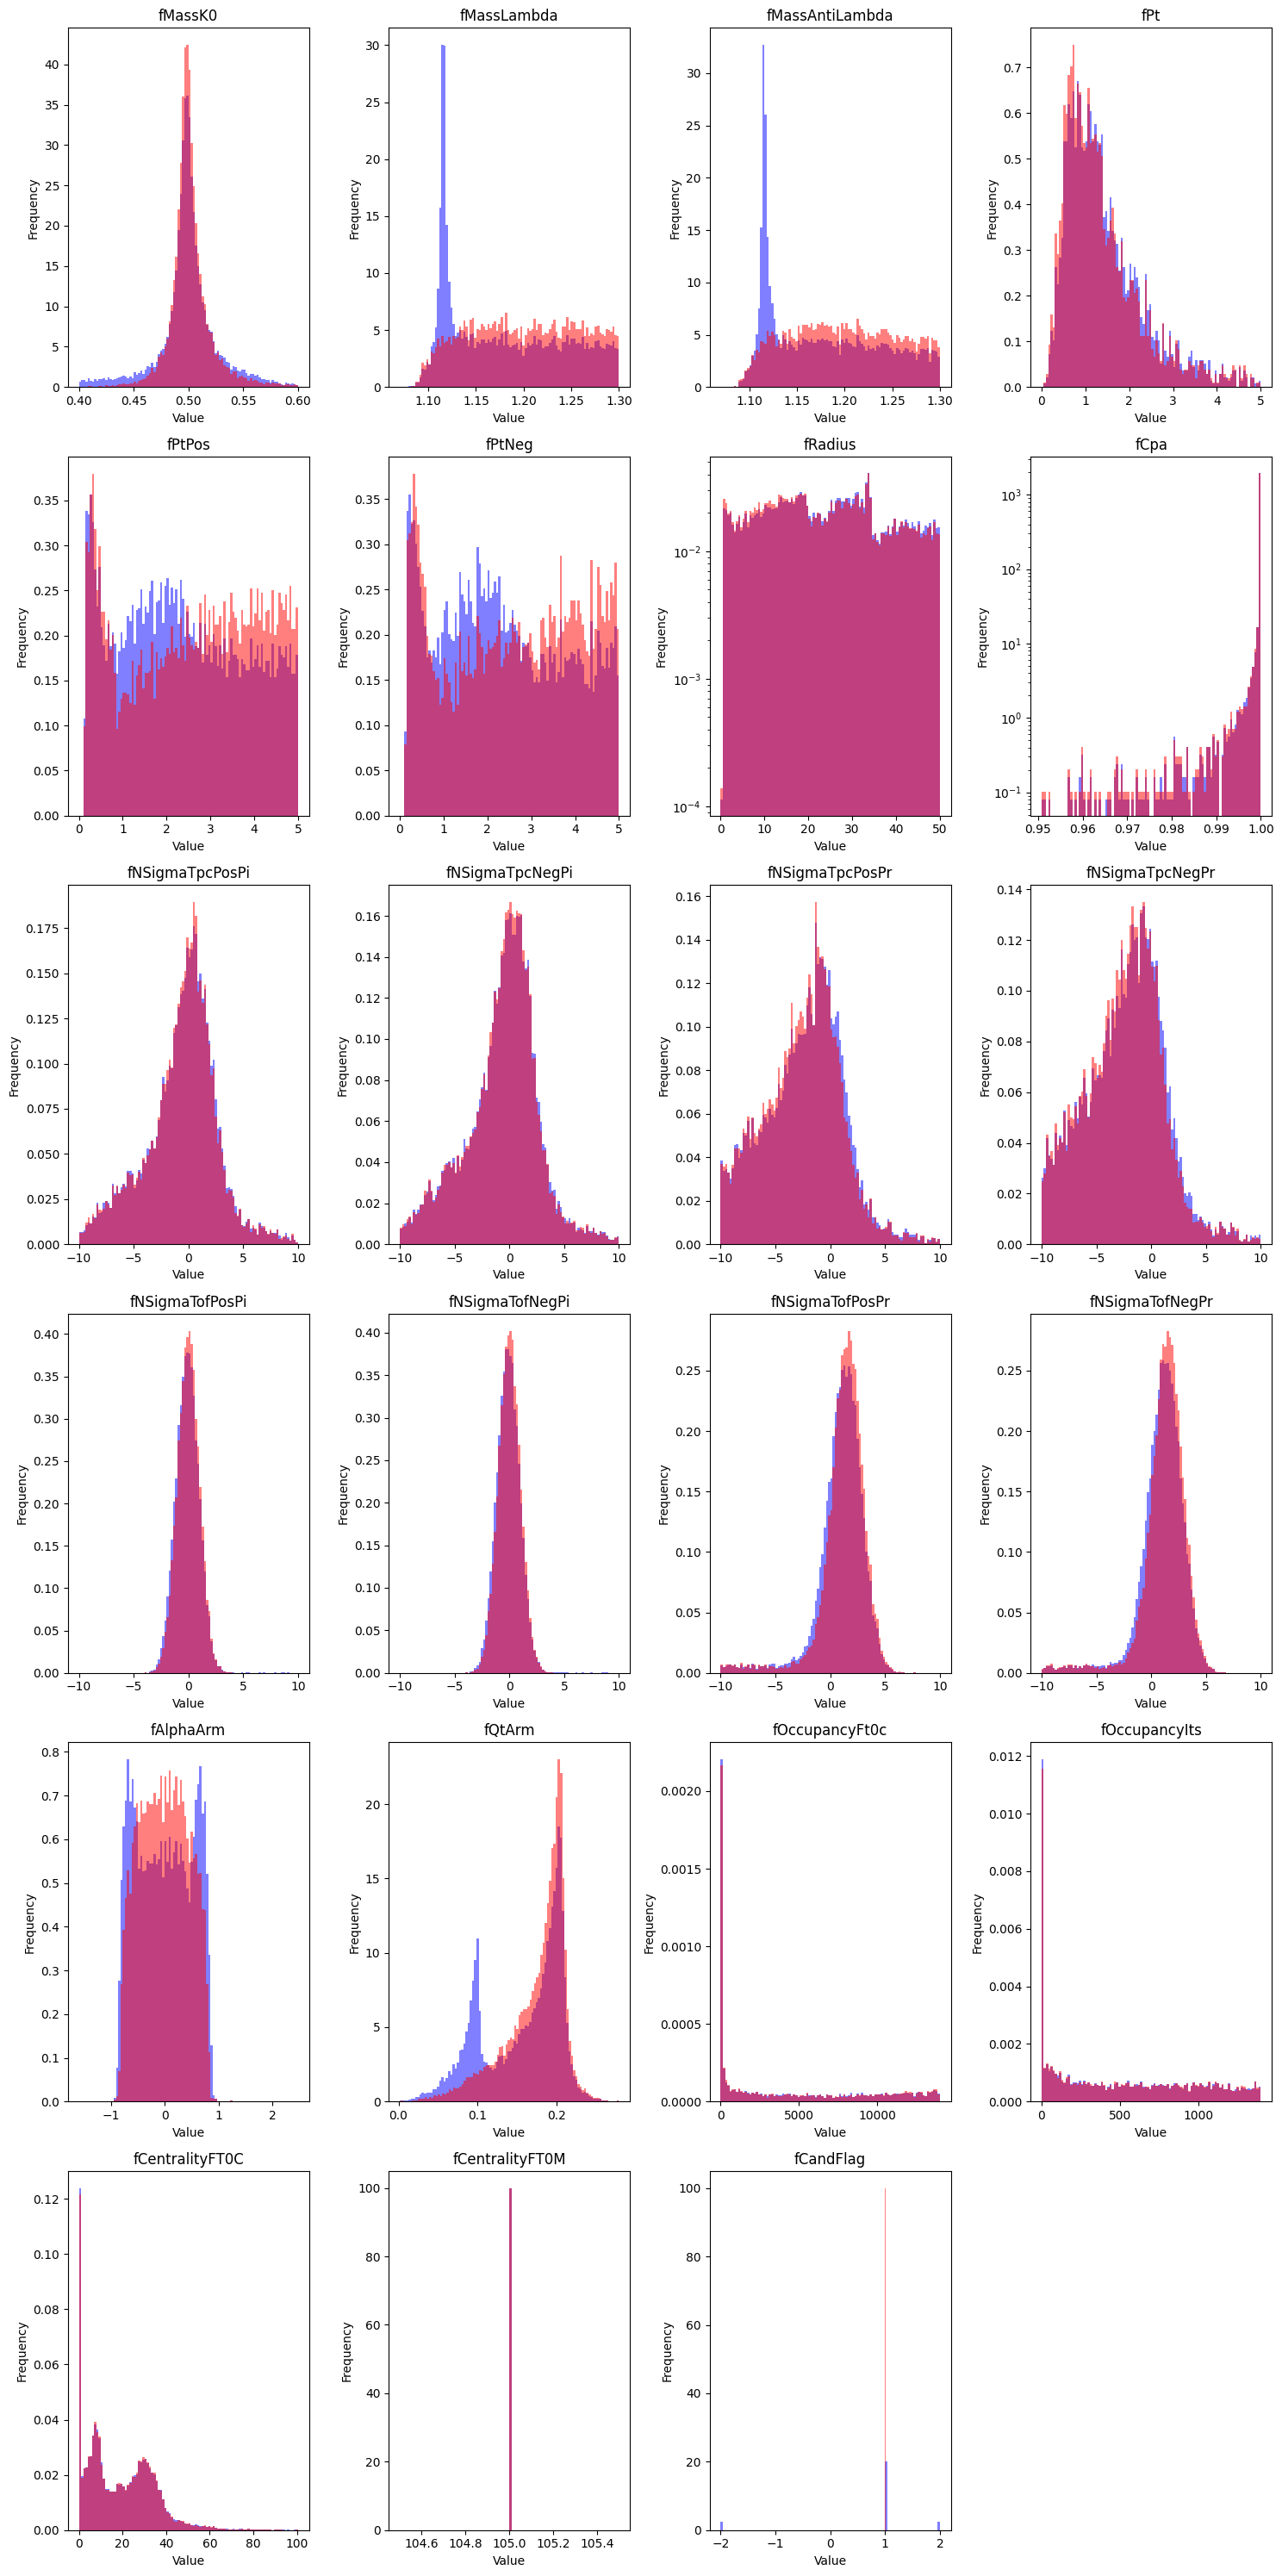

In [51]:
if df_mc_pbpb != "":
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    for i, column in enumerate(merged_df_mc_pbpb.columns):
        axes[i].hist(merged_df_mc_pbpb[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="before sel", color='blue', density=True)
        axes[i].hist(sel_merged_df_mc_pbpb[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="after sel", color='red', density=True)
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        if column in log_columns:
            axes[i].set_yscale('log')
    
    # Remove unused axes if any
    for i in range(n_columns, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()